Problem Statement

Understanding the relation between the various factor like bmi, number of children or smoker affecting the Hosiptalization charges. Predicting the hospitalization by understanding patterns from other parameters.

Understanding the data

age : age of primary beneficiary
    
sex : insurance contractor gender, female, male
    
bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
    
children : Number of children covered by health insurance / Number of dependents
smoker : Smoking
    
region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    
charges : Individual medical costs billed by health insurance

In [254]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
from sklearn.metrics import r2_score


In [255]:
#Visualization Plot Settings
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [256]:
#Read DataFrame
data = pd.read_csv('medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [257]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [258]:
data.shape

(1338, 7)

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [260]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [261]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [262]:
print("Find most important features relative to target")
corr = data.corr()
corr.sort_values(["charges"], ascending = False, inplace = True)
corr
print(corr['charges'])

Find most important features relative to target
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


# DATA VISULIZATION

<AxesSubplot:xlabel='charges', ylabel='Density'>

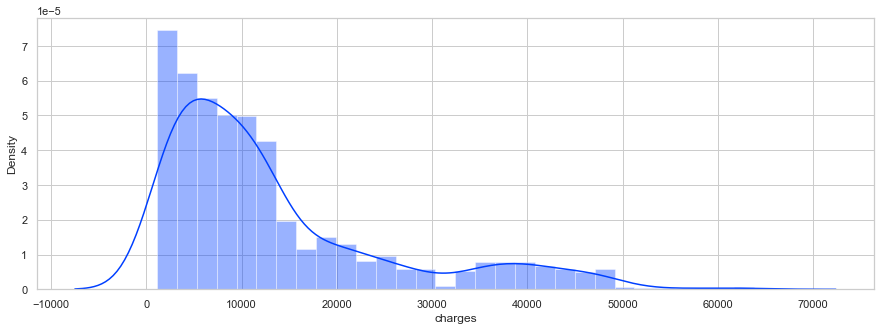

In [263]:
sns.distplot(data['charges'])

In [264]:
data['charges'].skew()

1.5158796580240388

The above distribution tells us the charge is not normally distributed, It has high skewness. We will deal with it later. Also most of charges are below 50k

SEX

<AxesSubplot:xlabel='sex', ylabel='count'>

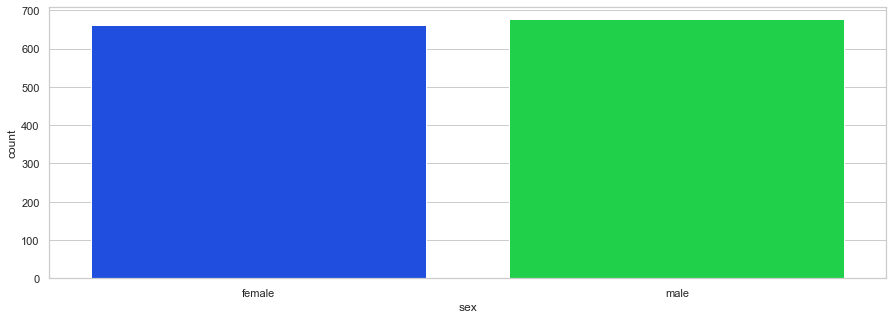

In [265]:
sns.countplot(data['sex'])

Count of male and female is more or less equal

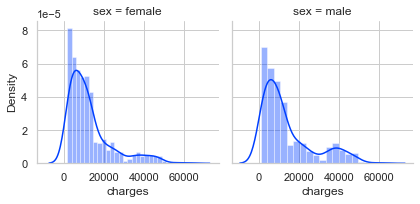

In [266]:
g=sns.FacetGrid(data,col='sex')
g=g.map(sns.distplot,"charges")

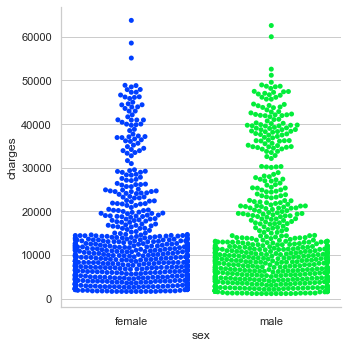

In [267]:
sns.catplot(y='charges',x='sex',data=data,kind="swarm")

It does not look there is any difference in the charging based on sex of an individual. We will explore further with other variable. Till now insurance does not depend if you are male or female.

SMOKER

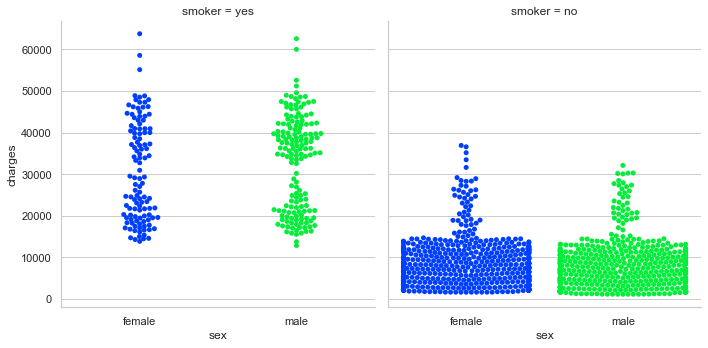

In [268]:
sns.catplot(y='charges',x='sex',col='smoker',data=data,kind="swarm")

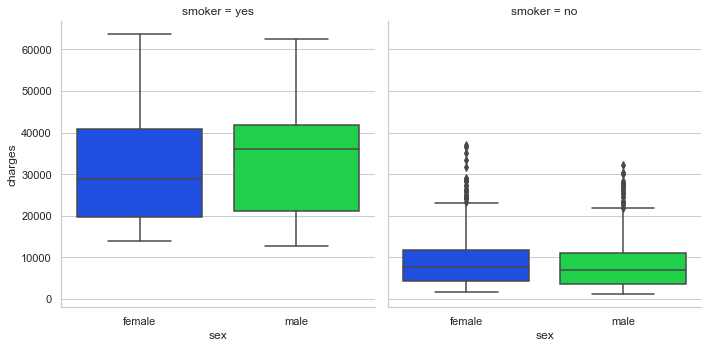

In [269]:
sns.catplot(y='charges',x='sex',col='smoker',data=data,kind="box")

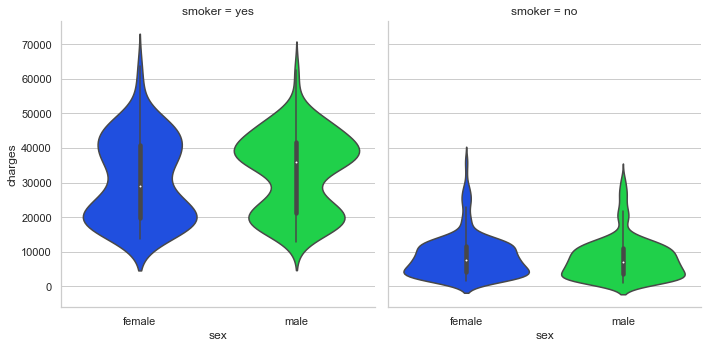

In [270]:
sns.catplot(y='charges',x='sex',col='smoker',data=data,kind="violin")

In [271]:

data[(data['smoker']=='yes')&(data['sex']=='male')]['charges'].mean()

33042.00597528302

In [272]:
data[(data['smoker']=='yes')&(data['sex']=='female')]['charges'].mean()

30678.996276260867

From the diagram it is clear that smoking has high correlation with charges, if you smoke , then insurance paid will be high irrespective of gender. Further in the smoking categroy the mean of male smoker is higher than female smoker, need to compare with other variable like age and bmi to know why are they charged more than female.

Age

<AxesSubplot:xlabel='age', ylabel='Density'>

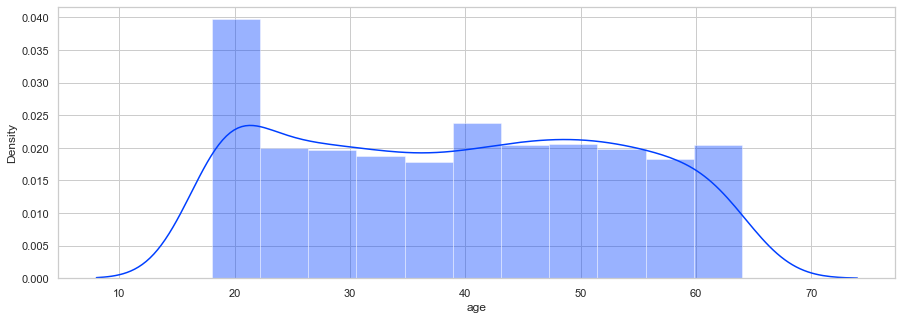

In [273]:

sns.distplot(data['age'])

<AxesSubplot:xlabel='age', ylabel='charges'>

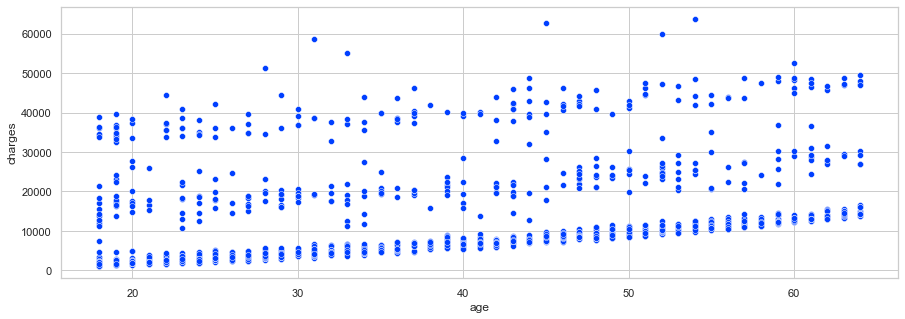

In [274]:

sns.scatterplot(x='age', y='charges',data=data)

In [275]:

data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

From the data it is visible that the minimum age is 18 and the maximum age is 64. So if we convert this numerical data into categorical data we can get better insight of the data.

SO lets convert the age into: 18yrs-26 yrs as young , 27yrs-40yrs as adult,41yrs to 55yrs as senior adult and 56yrs to 64yrs as Elder

In [276]:
data['age_cat']=np.NAN
lst = [data]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 26), 'age_cat'] = 'Young'
    col.loc[(col['age'] > 26) & (col['age'] <= 40), 'age_cat'] = 'Adult'
    col.loc[(col['age'] > 40) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'

In [277]:
data['age_cat'].value_counts()

Senior Adult    421
Adult           367
Young           334
Elder           216
Name: age_cat, dtype: int64

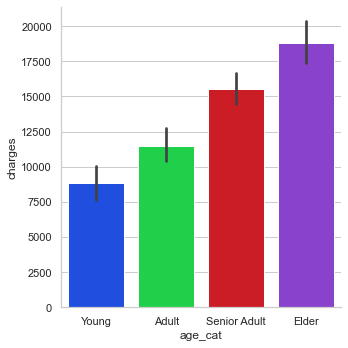

In [278]:
sns.catplot(x='age_cat', y='charges',data=data,kind='bar')

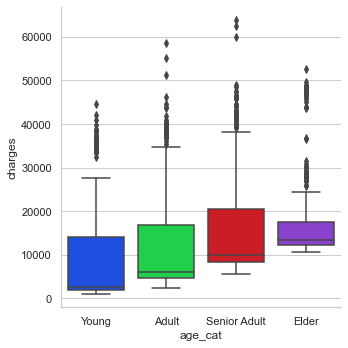

In [279]:
sns.catplot(x='age_cat', y='charges',data=data,kind='box')

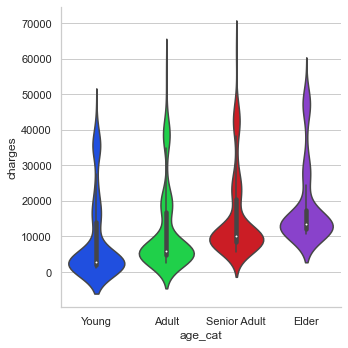

In [280]:
sns.catplot(x='age_cat', y='charges',data=data,kind='violin')

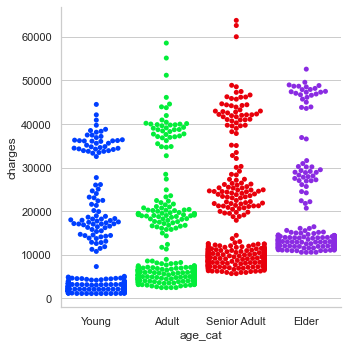

In [281]:
sns.catplot(x='age_cat', y='charges',data=data,kind='swarm')

From the above we can now easily see the corelation(ordinal) between age and charges, as the age increase insurance charge increase. But each group has some high values need to understand the reason, using other features.

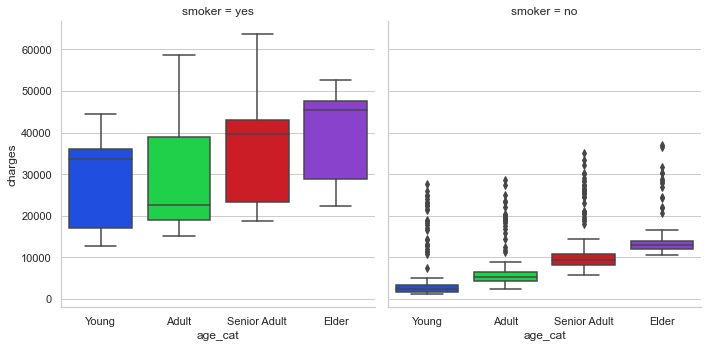

In [282]:
sns.catplot(x='age_cat', y='charges',data=data,kind='box',col='smoker')

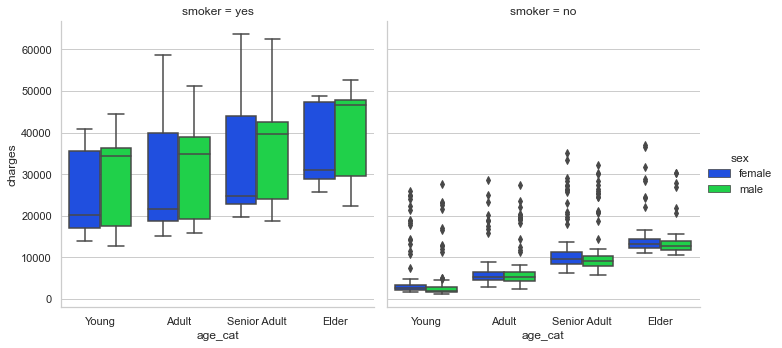

In [283]:
sns.catplot(x='age_cat', y='charges',data=data,kind='box',col='smoker',hue='sex')

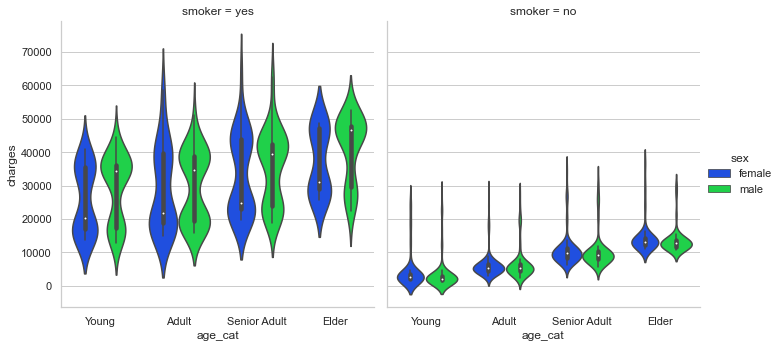

In [284]:
sns.catplot(x='age_cat', y='charges',data=data,kind='violin',col='smoker',hue='sex')

In [285]:
data[(data['age_cat']=='Adult')&(data['smoker']=='yes')&(data['sex']=='male')]['charges'].describe()

count       48.000000
mean     29621.263878
std      10518.151459
min      15820.699000
25%      19312.762675
50%      34739.307450
75%      38821.587575
max      51194.559140
Name: charges, dtype: float64

In [286]:
data[(data['age_cat']=='Adult')&(data['smoker']=='yes')&(data['sex']=='female')]['charges'].describe()

count       33.000000
mean     28947.918231
std      12586.295075
min      15006.579450
25%      18765.875450
50%      21659.930100
75%      39836.519000
max      58571.074480
Name: charges, dtype: float64

So from this we can confirm that non smoker of any age has low insurance charges in comparison to smokers.

1)In non smoker category, Males has slightly less insurance cost in comparison to female. 2)in smoker category, mean cost of male are higher than female.

In [287]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young
1,18,male,33.770,1,no,southeast,1725.55230,Young
2,28,male,33.000,3,no,southeast,4449.46200,Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult


<AxesSubplot:xlabel='bmi', ylabel='charges'>

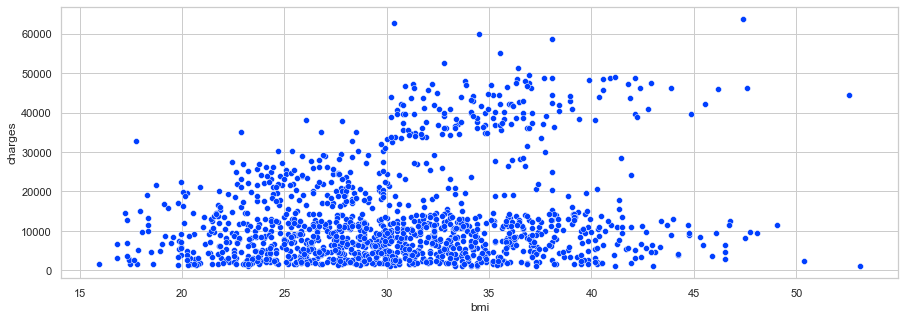

In [288]:
sns.scatterplot(x='bmi',y='charges',data=data)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

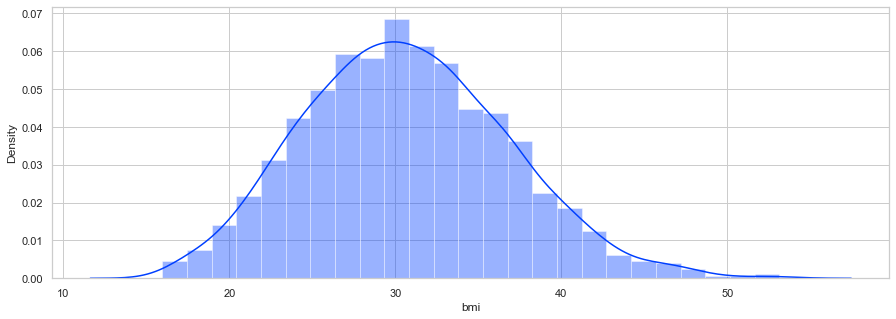

In [289]:
sns.distplot(data['bmi'])

In [290]:
data['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

If we see a BMI chart, there is 5 classes, 15 to 18 is underweight , 19 to 24 is healthy ,25 to 29 is overweight ,30 to 39 is obese and greater than 40 is extremly obese.So we will divide our data into that categories.

In [291]:
data.loc[(data['bmi']>= 15)&(data['bmi']<19), 'bmi_cat'] = 'underweight'
data.loc[(data['bmi']>= 19)&(data['bmi']<25), 'bmi_cat'] = 'healthy'
data.loc[(data['bmi']>= 25)&(data['bmi']<30), 'bmi_cat'] = 'overweight'
data.loc[(data['bmi']>= 30)&(data['bmi']<40), 'bmi_cat'] = 'obese'
data.loc[(data['bmi']>= 40), 'bmi_cat'] = 'ext_obese'

In [292]:
data['bmi_cat'].value_counts()

obese          616
overweight     386
healthy        221
ext_obese       91
underweight     24
Name: bmi_cat, dtype: int64

In [293]:
data['bmi_cat'].unique()

array(['overweight', 'obese', 'healthy', 'ext_obese', 'underweight'],
      dtype=object)

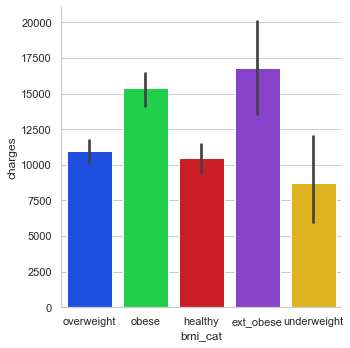

In [294]:
sns.catplot(x='bmi_cat',y='charges',kind='bar',data=data)

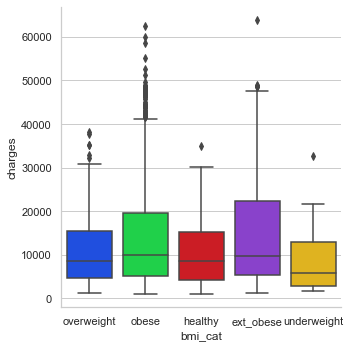

In [295]:
sns.catplot(x='bmi_cat',y='charges',kind='box',data=data)

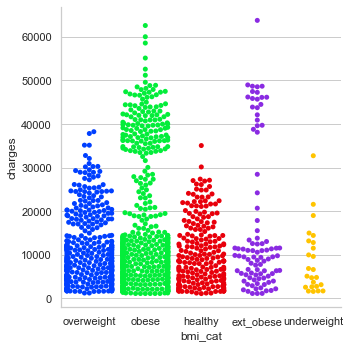

In [296]:
sns.catplot(x='bmi_cat',y='charges',kind='swarm',data=data)

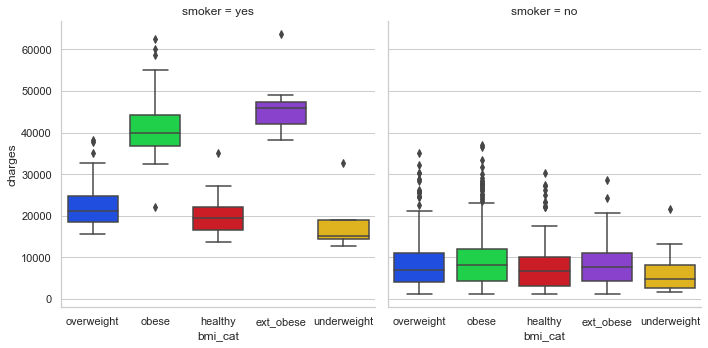

In [297]:

sns.catplot(x='bmi_cat',y='charges',col='smoker',kind='box',data=data)

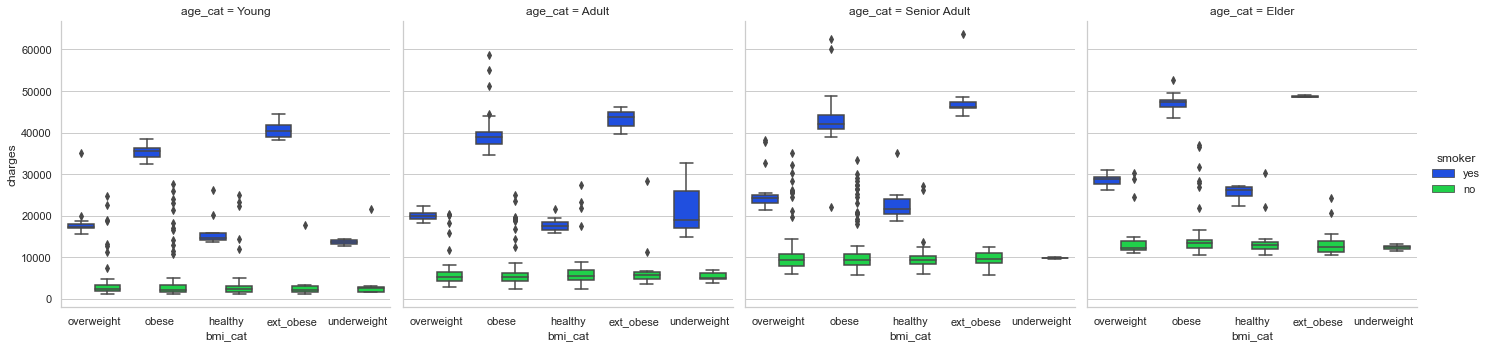

In [298]:
sns.catplot(x='bmi_cat',y='charges',col='age_cat',hue='smoker',kind='box',data=data)

Lets analyzse the above plots. In all age category on thing is common, if you are obese or more and you smoke the expense will be very high. The same is applicabe for overweight and healthy but the ratio of increase is lesser than obese. Further with increasein age, expense increases as we have seen earlier.

CHILDREN

<AxesSubplot:xlabel='children', ylabel='count'>

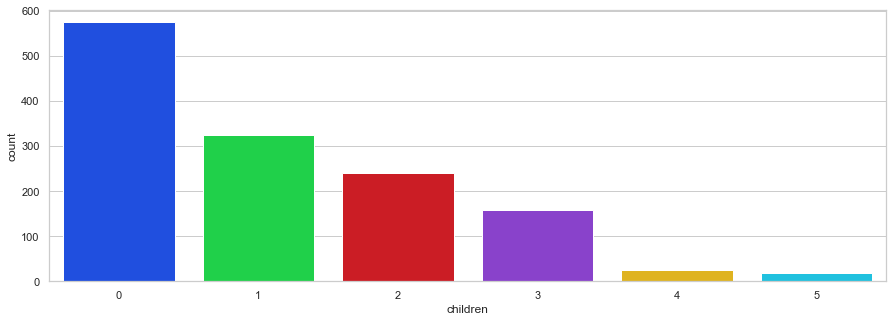

In [299]:
sns.countplot(data['children'])

<AxesSubplot:xlabel='children', ylabel='charges'>

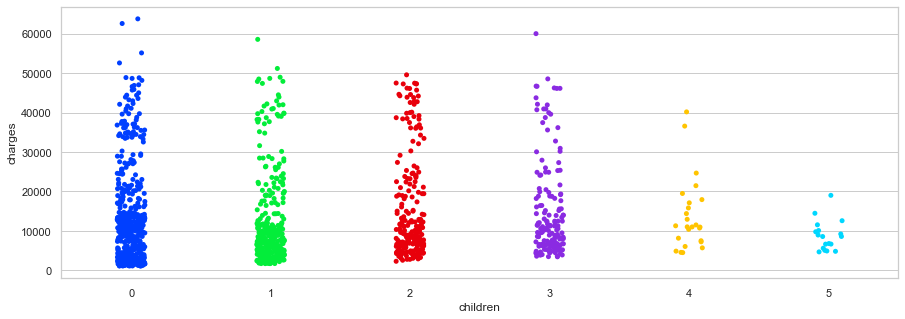

In [300]:
sns.stripplot(x="children", y="charges", data=data, size = 5, jitter = True)

In [301]:

data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [302]:
data['children']=data['children'].map({0:'0',1:'1',2:'2',3:'3+',4:'3+',5:'3+'})

In [303]:
data['children'].value_counts()

0     574
1     324
2     240
3+    200
Name: children, dtype: int64

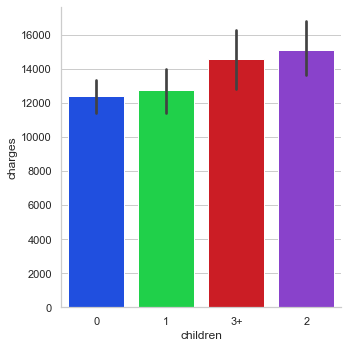

In [304]:
sns.catplot(x='children',y='charges',data=data,kind='bar')

Lets see if people tend to quit smoking or dont smoke if they have children

<AxesSubplot:xlabel='children', ylabel='count'>

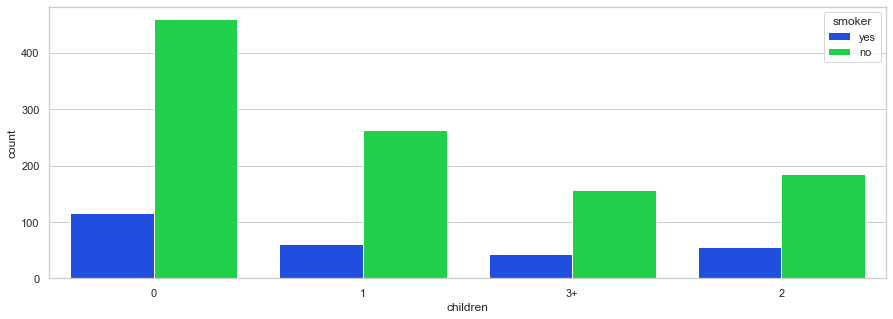

In [305]:
sns.countplot(x='children',hue='smoker',data=data)

In [306]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

No children present or not people do smoke

In [307]:

data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young,obese
2,28,male,33.000,3+,no,southeast,4449.46200,Adult,obese
3,33,male,22.705,0,no,northwest,21984.47061,Adult,healthy
4,32,male,28.880,0,no,northwest,3866.85520,Adult,overweight


Lets see if you have more children then do you get good time to take care of yourselve, eat well, do workout etc..or you dont get time and time and get overweight.

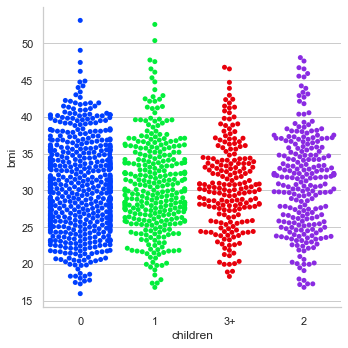

In [308]:

sns.catplot(x='children',y='bmi',data=data,kind='swarm')

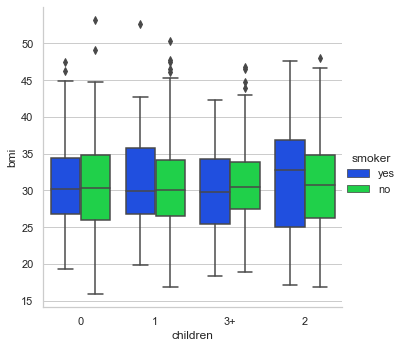

In [309]:
sns.catplot(x='children',y='bmi',hue='smoker',data=data,kind='box')

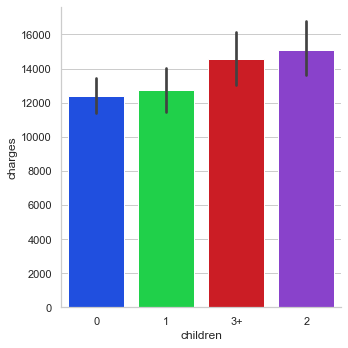

In [310]:
sns.catplot(x='children',y='charges',data=data,kind='bar')

It looks like having children dont affect your BMI. However with increase in no of children medical expense increases. but if you see above distribution we can safely say having 0 or 1 child expnse is more or less equal, similarly having 2 or more child expense will be similar. So lets disribute into two part. 'less' if no of children is less than equal to 1 and 'more; if it is greater than equal to 2.

In [311]:
data['child_cat']=np.NAN
data.loc[(data['children']=='0')|(data['children']=='1'), 'child_cat'] = 'less'
data.loc[(data['children']=='2')|(data['children']=='3+'), 'child_cat'] = 'more'

In [312]:

data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat,child_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young,overweight,less
1,18,male,33.770,1,no,southeast,1725.55230,Young,obese,less
2,28,male,33.000,3+,no,southeast,4449.46200,Adult,obese,more
3,33,male,22.705,0,no,northwest,21984.47061,Adult,healthy,less
4,32,male,28.880,0,no,northwest,3866.85520,Adult,overweight,less


REGION

In [313]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Let see the distribution of smoker based on region

<AxesSubplot:xlabel='region', ylabel='count'>

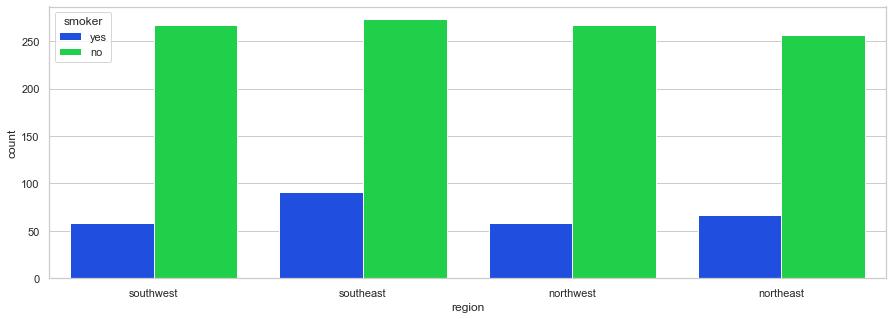

In [314]:
sns.countplot(x='region',hue='smoker',data=data)


Southeast has the maximum no of smoker followed by northeast , thus the charges will also be high for southeast followed by northeast.

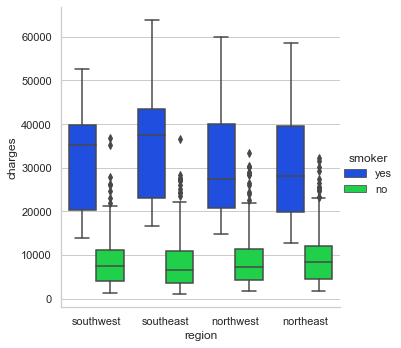

In [315]:
sns.catplot(x='region',y='charges',hue='smoker',data=data,kind='box')

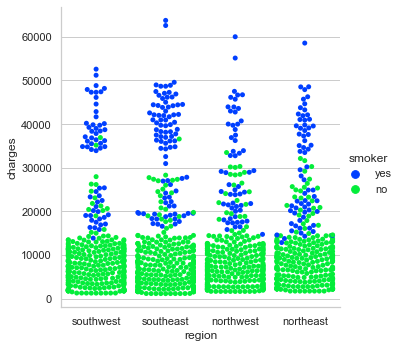

In [316]:
sns.catplot(x='region',y='charges',hue='smoker',data=data,kind='swarm')

As we thought since southeast had maximum no of smoker followed by northeast, charges are higher for southeast.

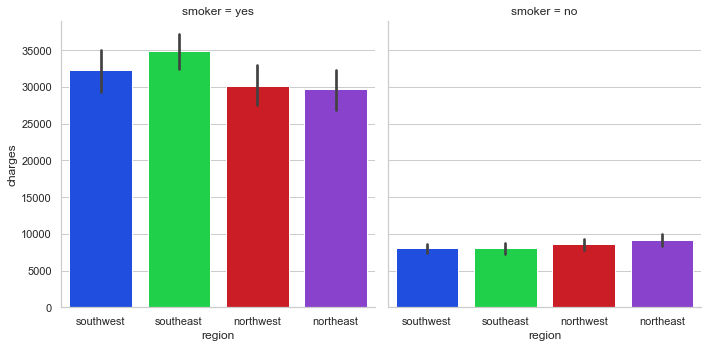

In [317]:
sns.catplot(x='region',y='charges',col='smoker',data=data,kind='bar')

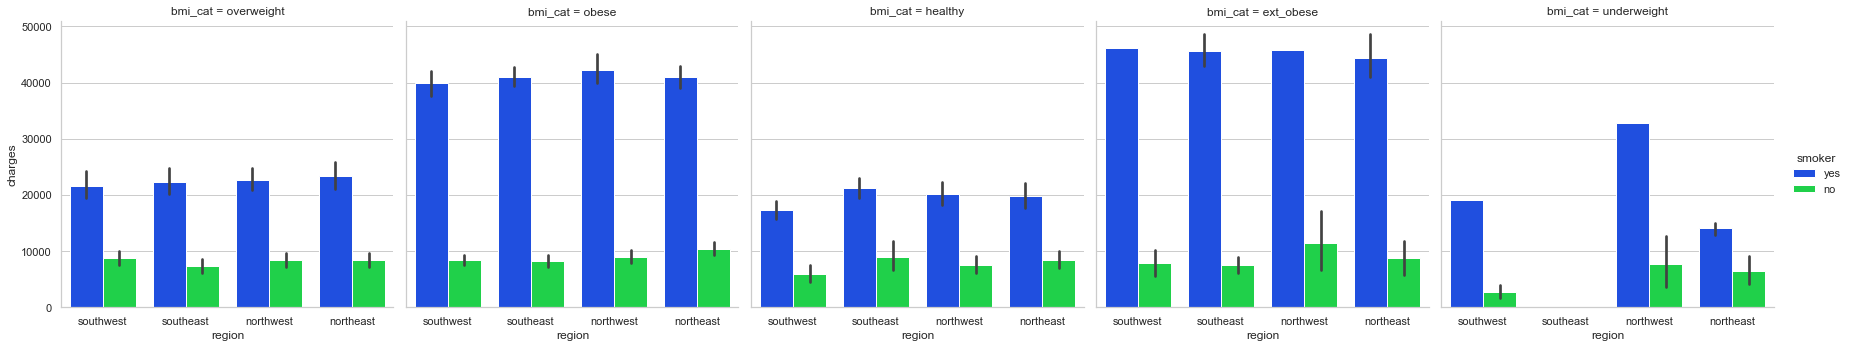

In [318]:

sns.catplot(x='region',y='charges',col='bmi_cat',hue='smoker',data=data,kind='bar')

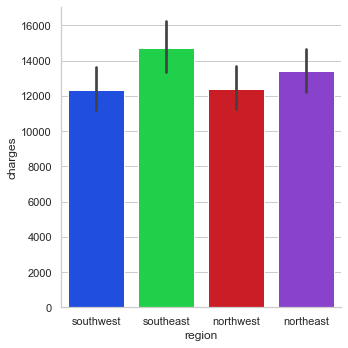

In [319]:
sns.catplot(x='region',y='charges',data=data,kind='bar')

We cannot find any trend in charges based on region, when we are consider all the factors. thus we will one hot code this feature.

# FEATURE ENGG

In [320]:
data1=data.copy()

In [321]:
data1.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat,child_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young,overweight,less
1,18,male,33.770,1,no,southeast,1725.55230,Young,obese,less
2,28,male,33.000,3+,no,southeast,4449.46200,Adult,obese,more
3,33,male,22.705,0,no,northwest,21984.47061,Adult,healthy,less
4,32,male,28.880,0,no,northwest,3866.85520,Adult,overweight,less


In [322]:
data1=data1.drop(['age','bmi','children'],axis=1)

In [323]:

data1['age_cat'].unique()

array(['Young', 'Adult', 'Senior Adult', 'Elder'], dtype=object)

In [324]:
data1['bmi_cat'].unique()

array(['overweight', 'obese', 'healthy', 'ext_obese', 'underweight'],
      dtype=object)

In [325]:

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        1338 non-null   object 
 1   smoker     1338 non-null   object 
 2   region     1338 non-null   object 
 3   charges    1338 non-null   float64
 4   age_cat    1338 non-null   object 
 5   bmi_cat    1338 non-null   object 
 6   child_cat  1338 non-null   object 
dtypes: float64(1), object(6)
memory usage: 73.3+ KB


In [326]:
data1['age_cat']=data1['age_cat'].map({'Young':0, 'Adult':1, 'Senior Adult':2, 'Elder':3})
data1['bmi_cat']=data1['bmi_cat'].map({'underweight':0, 'healthy':1, 'overweight':2, 'obese':3,'ext_obese':4})
data1['child_cat']=data1['child_cat'].map({'less':0, 'more':1})

In [327]:
#data_hot=data1[['sex','smoker','region','age_cat','bmi_cat','child_cat']]

In [328]:
#data_hot1 = pd.get_dummies(data_hot)

In [329]:
#data_final=pd.concat([data_hot1,data1['charges']],axis=1)

In [330]:

data1.head()


,sex,smoker,region,charges,age_cat,bmi_cat,child_cat
0,female,yes,southwest,16884.92400,0,2,0
1,male,no,southeast,1725.55230,0,3,0
2,male,no,southeast,4449.46200,1,3,1
3,male,no,northwest,21984.47061,1,1,0
4,male,no,northwest,3866.85520,1,2,0


In [331]:
data1['smoker']=data1['smoker'].map({'no':0, 'yes':1})

In [332]:
data1.head()


,sex,smoker,region,charges,age_cat,bmi_cat,child_cat
0,female,1,southwest,16884.92400,0,2,0
1,male,0,southeast,1725.55230,0,3,0
2,male,0,southeast,4449.46200,1,3,1
3,male,0,northwest,21984.47061,1,1,0
4,male,0,northwest,3866.85520,1,2,0


In [333]:
data_hot = pd.get_dummies(data1['region'])
data_hot1 = pd.get_dummies(data1['sex'])

In [334]:

data1

,sex,smoker,region,charges,age_cat,bmi_cat,child_cat
0,female,1,southwest,16884.92400,0,2,0
1,male,0,southeast,1725.55230,0,3,0
2,male,0,southeast,4449.46200,1,3,1
3,male,0,northwest,21984.47061,1,1,0
4,male,0,northwest,3866.85520,1,2,0
...,...,...,...,...,...,...,...
1333,male,0,northwest,10600.54830,2,3,1
1334,female,0,northeast,2205.98080,0,3,0
1335,female,0,southeast,1629.83350,0,3,0
1336,female,0,southwest,2007.94500,0,2,0


In [335]:
data1=data1.drop(['region','sex'],axis=1)

In [336]:
data_final=pd.concat([data1,data_hot,data_hot1],axis=1)

In [337]:
data_final.head()Z



,smoker,charges,age_cat,bmi_cat,child_cat,northeast,northwest,southeast,southwest,female,male
0,1,16884.92400,0,2,0,0,0,0,1,1,0
1,0,1725.55230,0,3,0,0,0,1,0,0,1
2,0,4449.46200,1,3,1,0,0,1,0,0,1
3,0,21984.47061,1,1,0,0,1,0,0,0,1
4,0,3866.85520,1,2,0,0,1,0,0,0,1


In [ ]:
data1=data1.drop(['region','sex'],axis=1)

In [339]:
data_final=pd.concat([data1,data_hot,data_hot1],axis=1)

In [340]:

data_final.head()

,smoker,charges,age_cat,bmi_cat,child_cat,northeast,northwest,southeast,southwest,female,male
0,1,16884.92400,0,2,0,0,0,0,1,1,0
1,0,1725.55230,0,3,0,0,0,1,0,0,1
2,0,4449.46200,1,3,1,0,0,1,0,0,1
3,0,21984.47061,1,1,0,0,1,0,0,0,1
4,0,3866.85520,1,2,0,0,1,0,0,0,1


Now the final part, we will work on charges. Let check the skewness.

# Skewness of dependent variable


 mu = 13270.42 and sigma = 12105.48



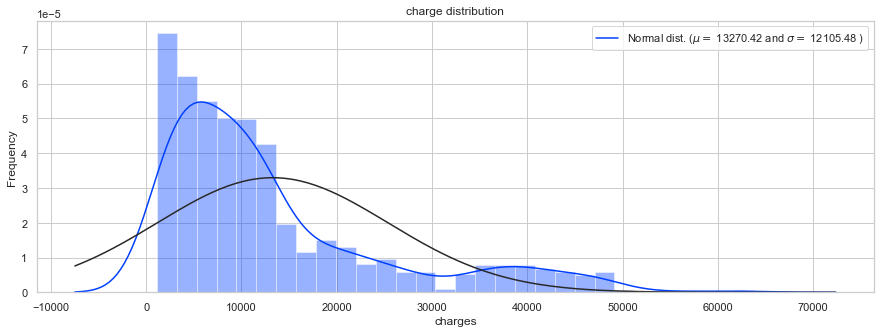

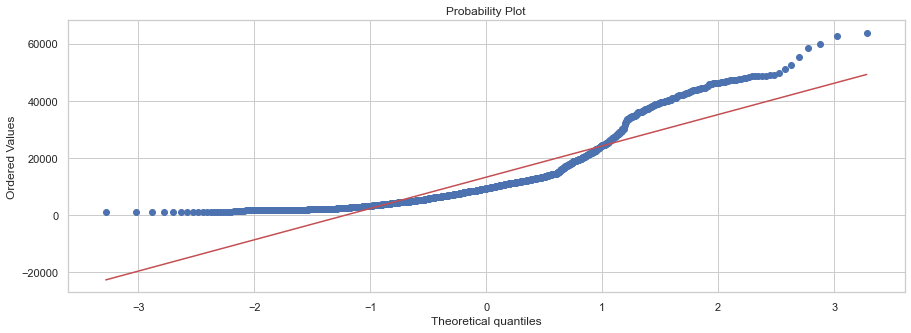

In [342]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['charges'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_final['charges'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('charge distribution')

fig = plt.figure()
res = stats.probplot(data['charges'], plot=plt)
plt.show()

In [343]:
data_final.head()

,smoker,charges,age_cat,bmi_cat,child_cat,northeast,northwest,southeast,southwest,female,male
0,1,16884.92400,0,2,0,0,0,0,1,1,0
1,0,1725.55230,0,3,0,0,0,1,0,0,1
2,0,4449.46200,1,3,1,0,0,1,0,0,1
3,0,21984.47061,1,1,0,0,1,0,0,0,1
4,0,3866.85520,1,2,0,0,1,0,0,0,1


In [344]:
data_final.shape

(1338, 11)

In [345]:
#data_final=data_final.drop(['sex_male','smoker_no','region_southwest','age_cat_Young','bmi_cat_healthy','child_cat_more'],axis=1)

# Modelling

In [378]:

Data_out=data_final['charges']
input_data=data_final.drop(['charges'],axis=1)

In [379]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(input_data)

In [380]:
R2_Scores = []
models1 = ['Linear Regression' , 'GradientBoosting Regression' ,'DecisionTreeRegressor','SVR','RandomForestRegressor','KNeighbours Regression']

In [381]:
#data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(input_data,Data_out,test_size=0.10)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.10)

In [382]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
#print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 1204
Number of data points in test data: 134


In [383]:
data_final.shape

(1338, 11)

# Standarization

In [384]:
# X_train.describe()


y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
#y_cv= y_cv.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)
#X_cv = sc_X.fit_transform(X_cv)
#y_cv = sc_y.fit_transform(y_cv)

# Linear regression

In [389]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)
print(lm)

# print the intercept
print(lm.intercept_)

LinearRegression()
[7.5041402e-17]


In [390]:

print(lm.coef_)

[[ 0.79350517  0.27395892  0.17235982  0.06636275  0.02012931  0.00139518
  -0.0106802  -0.01024229  0.00569698 -0.00569698]]


In [391]:
lm_pred = lm.predict(X_test)
lm_pred= lm_pred.reshape(-1,1)
print("accuracy: "+ str(lm.score(X_test,y_test)*100) + "%")

accuracy: 76.16899874450856%


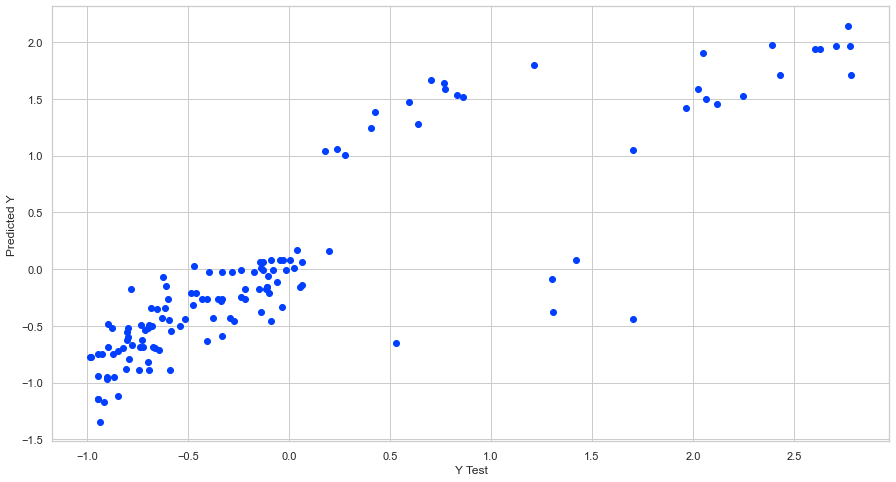

In [392]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lm_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [393]:
from sklearn import metrics

In [394]:
r2=r2_score(y_test, lm_pred)
print('MAE:', metrics.mean_absolute_error(y_test, lm_pred))
print('MSE:', metrics.mean_squared_error(y_test, lm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_pred)))
print('r2 score:',r2)
R2_Scores.append(r2)

MAE: 0.33378623264293006
MSE: 0.2383100125549144
RMSE: 0.48817006519748257
r2 score: 0.7616899874450855


# Gradient Boosting

In [395]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [396]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=4,
                          n_estimators=500)

In [397]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [398]:
r2=r2_score(y_test, clf_pred)
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))
print('r2 score:',r2)
R2_Scores.append(r2)

MAE: 0.19757845581914307
MSE: 0.12496741530458641
RMSE: 0.3535073058715851
r2 score: 0.8750325846954136


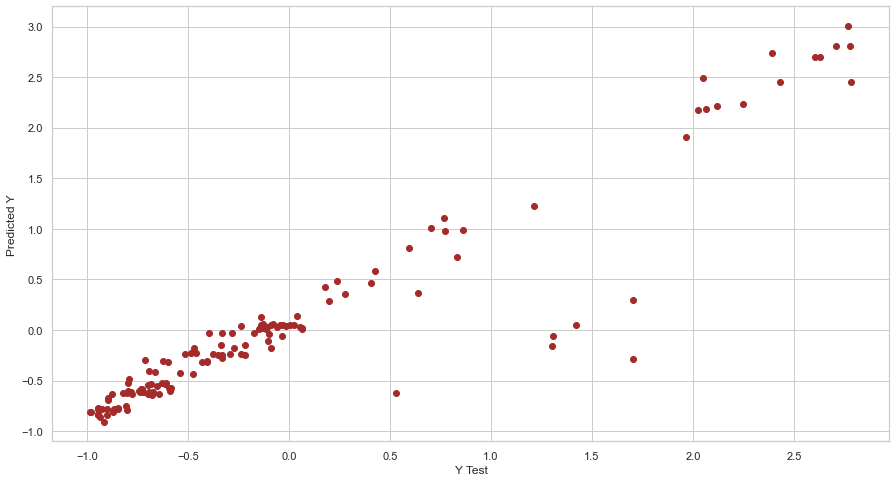

In [399]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# DecisionTreeRegressor

In [400]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [401]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [402]:

r2=r2_score(y_test, dtr_pred)
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print('r2 score:',r2)

R2_Scores.append(r2)

MAE: 0.24853520649725105
MSE: 0.16796664050455215
RMSE: 0.4098373342004754
r2 score: 0.8320333594954479


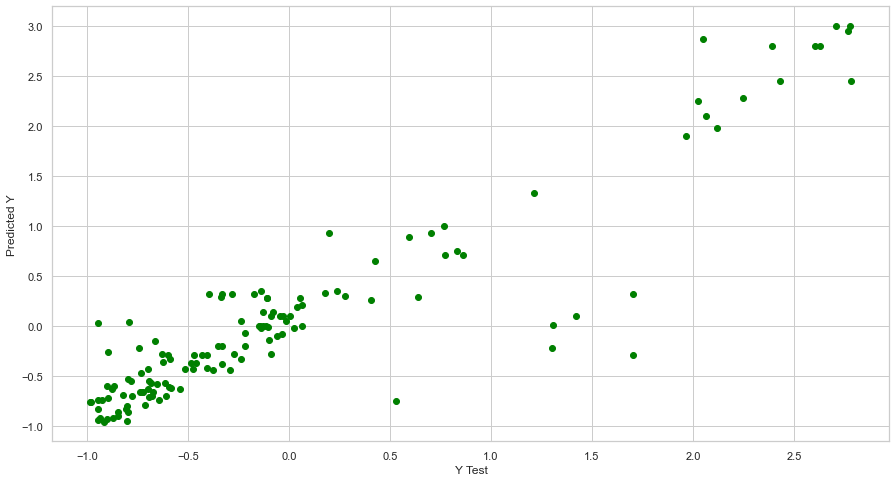

In [403]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# SVR

In [404]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [405]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)


In [406]:
r2=r2_score(y_test, svr_pred)
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('r2 score:',r2)

R2_Scores.append(r2)

MAE: 0.19587113249101673
MSE: 0.14584115731711736
RMSE: 0.3818915517749998
r2 score: 0.8541588426828827


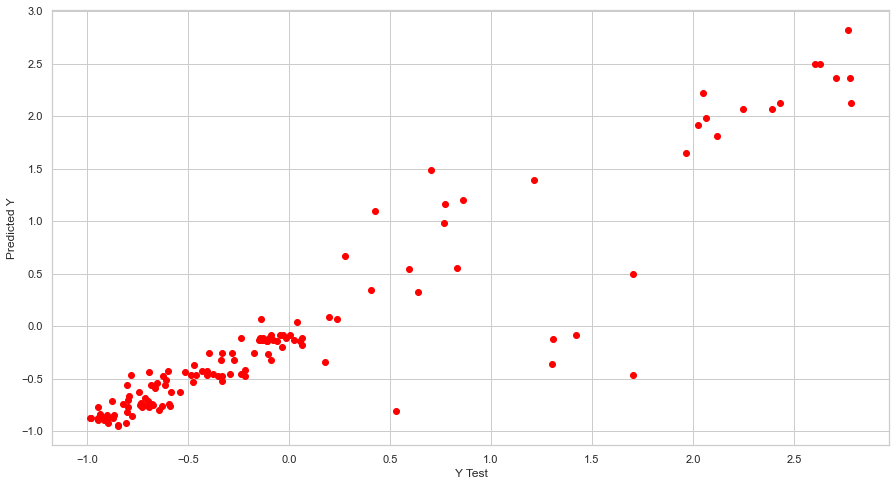

In [407]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# RandomForestRegressor

In [408]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1500, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1500, random_state=0)

In [409]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [410]:
r2=r2_score(y_test, rfr_pred)
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('r2 score:',r2)

R2_Scores.append(r2)

MAE: 0.23672339126758934
MSE: 0.15818236009957384
RMSE: 0.3977214604463453
r2 score: 0.8418176399004261


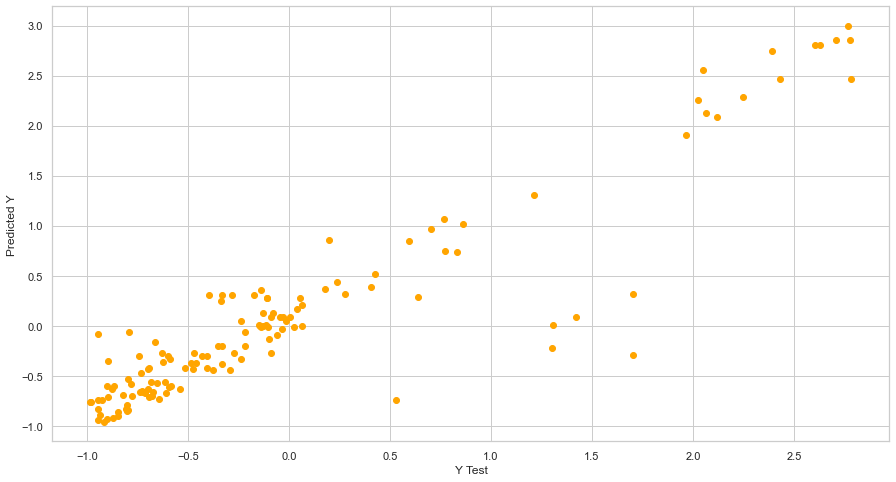

In [411]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# KNN

In [412]:
from sklearn.neighbors import KNeighborsRegressor
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


###### KNeighbours Regression ######
Score : 0.7619
[0.81429792 0.78191373 0.77430365 0.78946301 0.75213295]

MSE    : 0.24 
MAE    : 0.32 
RMSE   : 0.49 
R2     : 0.76 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [413]:

from sklearn.model_selection import GridSearchCV
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.7619
R2     : 0.76 


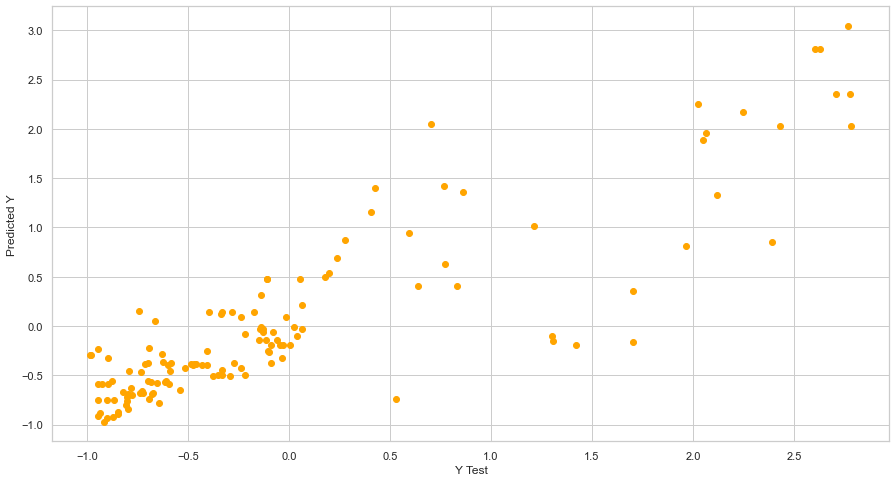

In [414]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [415]:
compare = pd.DataFrame({'Algorithms' : models1 , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)
compare

,Algorithms,R2-Scores
0,Linear Regression,0.761690
1,GradientBoosting Regression,0.875033
2,DecisionTreeRegressor,0.832033
3,SVR,0.854159
4,RandomForestRegressor,0.841818
5,KNeighbours Regression,0.761877


Based on the predictive modeling, gradientboosting Regression algorithm has the best score compared to the others